# <font color='blue'>Table of Contents</font>
<a id='top'></a>

### This report includes the following steps of the data wrangling process:


* [Gather](#gather)
* [Assess](#assess)
* [Clean](#clean)
* [Exploratory Data Analysis](#analysis)



## Kansas City Crime and Property Data (2015-2020)
The following analysis uses Kansas City, MO Data for Crime and Property Violations in 2015 and 2020.

All crime and property violation data was gathered from [OpenData KC](https://data.kcmo.org/) on December 5, 2020.

All tax and income data was gathered from [IRS Statistics](https://www.irs.gov/statistics/) on December 6, 2020.

Population data was gathered from [ZipAtlas](http://zipatlas.com/us/mo/kansas-city/zip-code-comparison/population-density.htm) on December 12, 2020.



## Questions
- What are the comparisons between income, crime, and property violation across zip code?
- What are the recent changes in rate of crime and property violations?
- What contributes to crime rate? property violation rate?

In [1]:
# import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gp
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline

## Gather Data

### Initial Data Import
- Rename headers that do not align between years due to misnaming (Reported_Time and Reported Time, From Time and From_Time, Firearm Used Flag, Location 1 and Location, etc) to provide a single variable across the entire dataframe

In [2]:
crime_2010 = pd.read_csv('kc_crime_2010.csv')
crime_2010.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2011 = pd.read_csv('kc_crime_2011.csv')
crime_2011.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2012 = pd.read_csv('kc_crime_2012.csv')
crime_2012.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2013 = pd.read_csv('kc_crime_2013.csv')
crime_2013.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2014 = pd.read_csv('kc_crime_2014.csv')
crime_2014.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2015 = pd.read_csv('kc_crime_2015.csv')
crime_2015.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2016 = pd.read_csv('kc_crime_2016.csv')
crime_2016.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2017 = pd.read_csv('kc_crime_2017.csv')
crime_2017.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2018 = pd.read_csv('kc_crime_2018.csv')
crime_2018.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 
crime_2019 = pd.read_csv('kc_crime_2019.csv')
crime_2019.rename(columns = {"From Time": "From_Time","To Time": "To_Time", "Reported Time": "Reported_Time", "Location 1": "Location", "Firearm Used Flag  ": "Firearm Used Flag"},  
          inplace = True) 

### Combine all crime dataframes together

In [3]:
crime_frames = [crime_2010, crime_2011, crime_2012, crime_2013, crime_2014, crime_2015, crime_2016, crime_2017, crime_2018, crime_2019]
crimes = pd.concat(crime_frames, ignore_index=True)

### Test Import Data for Consistency
Ensure that the columns translated over correctly

In [4]:
print(crimes.shape)
print(crimes.columns)
crimes.head()

(1234605, 26)
Index(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date', 'From_Time',
       'To_Date', 'To_Time', 'Offense', 'IBRS', 'Description', 'Beat',
       'Address', 'Zip Code', 'City', 'Rep_Dist', 'Area', 'DVFlag', 'Invl_No',
       'Involvement', 'Race', 'Sex', 'Age', 'Location', 'Firearm Used Flag',
       'Latitude', 'Longitude'],
      dtype='object')


,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
0,100048265,06/27/2010,13:46,06/27/2010,13:40,NaN,NaN,2655,90J,Trespassing,113,100 E 13 ST,NaN,KANSAS CITY,PJ1177,CPD,U,1.0,VIC,NaN,NaN,NaN,"100 13 ST\nKANSAS CITY, MO\n(39.19607633300046...",N,NaN,NaN
1,100043775,06/11/2010,21:00,06/10/2010,10:00,NaN,NaN,650,23G,Stealing Auto Parts/,999,9900 S UNKNOWN ST,0.0,KANSAS CITY,PKC000,PD1,U,1.0,VIC,B,M,40.0,NaN,N,NaN,NaN
2,100030602,04/27/2010,22:12,04/27/2010,19:00,NaN,NaN,1120,26A,Fraud,314,600 NORTON AV,64124.0,KANSAS CITY,PJ0731,EPD,U,1.0,VIC,W,F,59.0,"600 NORTON AV\nKANSAS CITY, MO 64124\n(39.1056...",N,NaN,NaN
3,100000611,01/03/2010,19:41,01/03/2010,19:41,NaN,NaN,1120,26A,Fraud,112,25/GRAND,64108.0,KANSAS CITY,PJ1015,CPD,U,2.0,VIC,NaN,NaN,NaN,"25 GRAND\nKANSAS CITY, MO 64108\n(39.076060142...",N,NaN,NaN
4,100036538,05/17/2010,17:17,03/15/2010,12:00,NaN,NaN,640,23F,Stealing From Auto,999,9900 S UNKNOWN ST,0.0,KANSAS CITY,PKC000,CPD,U,1.0,SUS,U,U,NaN,NaN,N,NaN,NaN


### Store Dataframe as File
Store combined original crime data (2010-2019) in a file to preserve original formatting and data quality

In [5]:
crimes.to_csv('crimes_2010-2019.csv',index=False)

### Import Complete Data Table (Crimes)

In [6]:
crimes_total = pd.read_csv('crimes_2010-2019.csv')

C:\Users\sjhal\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,7,10,11,13,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Import Complete Data Table (Property Violations)

In [7]:
violations = pd.read_csv('kc_property_violations.csv')

C:\Users\sjhal\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Import Population and Income Tables

In [8]:
pop = pd.read_csv('zipPop.csv')
income = pd.read_csv('zipIncome2010.csv')

### Import Geographic Data for Mapping Zip Codes

In [9]:
fp = "./Zip Codes/geo_export.shp"
map_df = gp.read_file(fp)

## Assess Data

In [10]:
# investigate first entries in the table
crimes_total.head(20)

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
0,100048265,06/27/2010,13:46,06/27/2010,13:40,NaN,NaN,2655,90J,Trespassing,113,100 E 13 ST,NaN,KANSAS CITY,PJ1177,CPD,U,1.0,VIC,NaN,NaN,NaN,"100 13 ST\nKANSAS CITY, MO\n(39.19607633300046...",N,NaN,NaN
1,100043775,06/11/2010,21:00,06/10/2010,10:00,NaN,NaN,650,23G,Stealing Auto Parts/,999,9900 S UNKNOWN ST,0.0,KANSAS CITY,PKC000,PD1,U,1.0,VIC,B,M,40.0,NaN,N,NaN,NaN
2,100030602,04/27/2010,22:12,04/27/2010,19:00,NaN,NaN,1120,26A,Fraud,314,600 NORTON AV,64124.0,KANSAS CITY,PJ0731,EPD,U,1.0,VIC,W,F,59.0,"600 NORTON AV\nKANSAS CITY, MO 64124\n(39.1056...",N,NaN,NaN
3,100000611,01/03/2010,19:41,01/03/2010,19:41,NaN,NaN,1120,26A,Fraud,112,25/GRAND,64108.0,KANSAS CITY,PJ1015,CPD,U,2.0,VIC,NaN,NaN,NaN,"25 GRAND\nKANSAS CITY, MO 64108\n(39.076060142...",N,NaN,NaN
4,100036538,05/17/2010,17:17,03/15/2010,12:00,NaN,NaN,640,23F,Stealing From Auto,999,9900 S UNKNOWN ST,0.0,KANSAS CITY,PKC000,CPD,U,1.0,SUS,U,U,NaN,NaN,N,NaN,NaN
5,100040840,06/01/2010,21:04,06/01/2010,21:04,NaN,NaN,401,13A,Aggravated Assault (,314,E 6TH / ELMWOOD,64123.0,KANSAS CITY,PJ0796,EPD,N,1.0,SUS,B,M,NaN,NaN,N,NaN,NaN
6,100093508,12/01/2010,16:20,10/15/2010,3:30,11/30/2010,3:30,650,23G,Stealing Auto Parts/,NaN,UNKNOWN,NaN,KANSAS CITY,NaN,NaN,U,1.0,VIC,W,M,29.0,"UNKNOWN KANSAS CITY, MO\n(39.52368635500045, -...",N,NaN,NaN
7,100050190,07/03/2010,20:13,07/03/2010,19:57,NaN,NaN,690,23H,Stealing All Other,411,00 NE 50 CT,64118.0,KANSAS CITY,PC0863,NPD,Y,1.0,SUS,B,M,25.0,"00 50 CT\nKANSAS CITY, MO 64118\n(39.184582963...",N,NaN,NaN
8,100042964,06/09/2010,10:54,05/15/2010,12:00,NaN,NaN,650,23G,Stealing Auto Parts/,999,9900 S UNKNOWN ST,0.0,KANSAS CITY,PKC000,CPD,U,1.0,SUS,U,U,NaN,NaN,N,NaN,NaN
9,100046091,06/20/2010,1:55,06/20/2010,1:55,NaN,NaN,2655,90J,Trespassing,113,100 E 13 ST,64111.0,KANSAS CITY,PJ1177,CPD,U,1.0,VIC,NaN,NaN,NaN,"100 13 ST\nKANSAS CITY, MO 64111\n(39.05550278...",N,NaN,NaN


In [11]:
# investigate first entries in the table
violations.head()

,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Code,Violation Description,Ordinance Number,Ordinance Chapter,Violation Entry Date,Address,County,State,Zip Code,Latitude,Longitude,KIVA PIN,Council District,Police Patrol Area,Inspection Area,Neighborhood,Code Violation Location
0,1225153,2019141615,Closed,07/30/2019,06/02/2020,62.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,08/06/2019,5111 E 40th St,Jackson,MO,64130.0,39.05270,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"
1,1059428,2012034662,Closed,03/21/2012,09/28/2012,140.0,NSWLLIMBS,LIMBS AND BRUSH,48-25 C.O.,48,03/22/2012,2300 E 74th St,Jackson,MO,64132.0,38.99297,-94.56039,115469,5.0,Metro,127,East Meyer 7,"2300 E 74th St\nMO 64132\n(38.99297, -94.56039)"
2,1124057,2014129843,Open,10/08/2014,NaN,2250.0,NSWLLIMBS,LIMBS AND BRUSH,48-25 C.O.,48,12/02/2020,7344 Lydia Ave,Jackson,MO,64131.0,38.99342,-94.57131,114703,5.0,Metro,128,East Meyer 6,"7344 Lydia Ave\nMO 64131\n(38.99342, -94.57131)"
3,1125358,2014139084,Closed,10/30/2014,06/01/2015,180.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,10/30/2014,2734 PASEO,Jackson,MO,64109.0,39.07638,-94.56570,27120,3.0,Central,25,Beacon Hills,"2734 PASEO\nMO 64109\n(39.07638, -94.5657)"
4,1162495,2016086040,Closed,07/25/2016,08/01/2016,7.0,NSWLLIMBS,LIMBS AND BRUSH,48-25 C.O.,48,07/26/2016,3005 E 32nd St,Jackson,MO,64128.0,39.06858,-94.54791,25056,3.0,East,57,Santa Fe,"3005 E 32nd St\nMO 64128\n(39.06858, -94.54791)"


In [12]:
# explore potential quality issues and data type for each variable
crimes_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234605 entries, 0 to 1234604
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Report_No          1234605 non-null  object 
 1   Reported_Date      1234605 non-null  object 
 2   Reported_Time      1234605 non-null  object 
 3   From_Date          1232741 non-null  object 
 4   From_Time          1231871 non-null  object 
 5   To_Date            468955 non-null   object 
 6   To_Time            492664 non-null   object 
 7   Offense            1234605 non-null  object 
 8   IBRS               1210249 non-null  object 
 9   Description        1219662 non-null  object 
 10  Beat               1228952 non-null  object 
 11  Address            1109286 non-null  object 
 12  Zip Code           1202857 non-null  float64
 13  City               1109243 non-null  object 
 14  Rep_Dist           1201501 non-null  object 
 15  Area               1227404 non-n

In [13]:
# explore 'Beat' variable for possible utility in analysis (none found)
crimes_total['Beat'].unique()

array([113.0, 999.0, 314.0, 112.0, nan, 411.0, 545.0, 242.0, 331.0, 243.0,
       142.0, 222.0, 234.0, 412.0, 642.0, 321.0, 312.0, 133.0, 231.0,
       232.0, 324.0, 213.0, 115.0, 341.0, 241.0, 122.0, 221.0, 322.0,
       224.0, 313.0, 542.0, 124.0, 413.0, 121.0, 415.0, 212.0, 544.0,
       344.0, 635.0, 343.0, 143.0, 334.0, 123.0, 543.0, 541.0, 643.0,
       421.0, 333.0, 141.0, 233.0, 134.0, 531.0, 535.0, 342.0, 422.0,
       332.0, 131.0, 132.0, 211.0, 223.0, 532.0, 345.0, 425.0, 644.0,
       114.0, 323.0, 636.0, 533.0, 641.0, 125.0, 534.0, 315.0, 631.0,
       634.0, 632.0, 311.0, 111.0, 144.0, 424.0, 414.0, 423.0, 316.0,
       633.0, 540.0, 385.0, 509.0, 137.0, 245.0, 216.0, 441.0, 325.0,
       109.0, 609.0, 675.0, 246.0, 537.0, 326.0, 139.0, 225.0, 564.0,
       346.0, 317.0, 2410.0, 0.0, 4999.0, 218.0, 336.0, 335.0, 220.0,
       209.0, 135.0, 244.0, 118.0, 309.0, 5411.0, 319.0, 235.0, 390.0,
       612.0, 621.0, 3321.0, 546.0, 3144.0, 145.0, 158.0, 671.0, 6410.0,
       146.

In [14]:
# explore city entries for utility in analysis and possible quality issues
crimes_total['City'].value_counts().head(40)

KANSAS CITY          1102762
KCMO                    1828
INDEPENDENCE            1364
LIBERTY                  376
GRANDVIEW                360
RAYTOWN                  311
GLADSTONE                235
PLATTE CITY              185
LEES SUMMIT              149
N KANSAS CITY            106
PARKVILLE                101
OVERLAND PARK             80
KANAS CITY                78
BLUE SPRINGS              66
BELTON                    58
KEARNEY                   51
RIVERSIDE                 49
LEAVENWORTH               43
LEAWOOD                   39
PLEASANT VLY              36
PL                        36
NKC                       35
NORTH KANSAS CITY         33
HARRISONVILLE             30
SUGAR CREEK               28
SHAWNEE                   27
KANSAS                    25
LENEXA                    24
KC                        24
JA                        23
KASNAS CITY               19
INDEP                     19
MERRIAM                   17
KANASAS CITY              17
NORTHMOOR     

In [15]:
# look at the most common zip codes
crimes_total['Zip Code'].value_counts().head(50)

64130.0    104211
64127.0     87413
64111.0     70522
64106.0     64034
64134.0     63244
64131.0     48793
64132.0     47914
64109.0     46192
64133.0     45752
64110.0     43632
64128.0     41612
64124.0     41573
64123.0     38516
64108.0     38337
64114.0     35414
64118.0     32418
64119.0     25869
64117.0     25363
64129.0     24921
64138.0     24719
64151.0     20591
64155.0     19527
64126.0     18548
64137.0     17653
64105.0     17128
99999.0     15711
64116.0     15379
64154.0     14443
64112.0     13392
64153.0     13001
64157.0     10975
64145.0     10060
64120.0      9525
64152.0      8906
64113.0      7505
64125.0      7498
64158.0      5372
64156.0      3411
64161.0      3352
64136.0      2792
64101.0      1946
64147.0      1796
64139.0      1494
64146.0      1492
64121.0       895
64102.0       890
0.0           477
64068.0       471
64104.0       437
64115.0       436
Name: Zip Code, dtype: int64

In [16]:
# investigate duplicate report entries (for suspect and victim, etc)
crimes_total[crimes_total.duplicated(subset="Report_No",keep=False)].sort_values("Reported_Date")

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
17860,100000186,01/01/2010,17:05,12/31/2009,22:00,01/01/2010,16:00,640,23F,Stealing From Auto,422,8600 N BOARDWALK AV,64153.0,KANSAS CITY,PP0321,NPD,U,1.0,SUS,U,U,NaN,"8600 BOARDWALK AV\nKANSAS CITY, MO 64153\n(39....",N,NaN,NaN
135358,100000124,01/01/2010,10:50,01/01/2010,10:30,NaN,NaN,802,13B,Non Agg Assault Dome,232,6600 LYDIA AV,64131.0,KANSAS CITY,PJ5070,MPD,U,1.0,VIC,B,F,29.0,"6600 LYDIA AV\nKANSAS CITY, MO 64131\n(39.0075...",N,NaN,NaN
134206,100000090,01/01/2010,6:56,01/01/2010,6:15,01/01/2010,6:20,702,240,Auto Theft,545,11300 DONNELLY AV,64134.0,KANSAS CITY,PJ7136,SPD,U,1.0,VIC,B,F,20.0,"11300 DONNELLY AV\nKANSAS CITY, MO 64134\n(38....",N,NaN,NaN
15047,100000026,01/01/2010,0:55,01/01/2010,0:44,NaN,NaN,1401,290,Property Damage,422,5100 NW 85 ST,64151.0,KANSAS CITY,PP0336,NPD,U,1.0,SUS,U,U,NaN,"5100 85 ST\nKANSAS CITY, MO 64151\n(39.2162419...",N,NaN,NaN
15098,100000246,01/01/2010,22:35,01/01/2010,10:00,01/01/2010,11:00,1401,290,Property Damage,341,6000 E 15 TE,64127.0,KANSAS CITY,PJ1431,EPD,U,1.0,SUS,U,U,NaN,"6000 15\nTE KANSAS CITY, MO 64127\n(39.0896241...",N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231604,KC19098977,12/31/2019,23:21,12/31/2019,23:21,NaN,NaN,Assault (Aggravated),13A,Aggravated Assault,333,4000 BELLEFONTAINE AVE,64127.0,KANSAS CITY,PJ3285,EPD,N,NaN,VIC,W,F,NaN,NaN,True,NaN,NaN
1231134,KC19098914,12/31/2019,16:18,12/31/2019,16:00,NaN,NaN,Trespass of Real Property,90J,Trespass of Real Property,643,8500 N CHURCH RD,64157.0,KANSAS CITY,PC0282,SCP,N,NaN,VIC,NaN,NaN,NaN,8500 N CHURCH RD\nKANSAS CITY 64157\n(39.2460...,False,NaN,NaN
1233213,KC19098804,12/31/2019,07:37,12/31/2019,07:37,NaN,NaN,Assault (Aggravated),13A,Aggravated Assault,213,6700 MANCHESTER AVE,64129.0,KANSAS CITY,PJ5274,MPD,N,NaN,SUS,W,M,36.0,NaN,False,NaN,NaN
1225851,KC19098948,12/31/2019,19:57,12/31/2019,19:57,12/31/2019,19:57,Assault (Non-Aggravated),13B,Simple Assault,332,35 ST and PROSPECT BLVD,64127.0,KANSAS CITY,NaN,EPD,N,NaN,VIC,B,M,81.0,NaN,False,NaN,NaN


In [17]:
# further explore a report with multiple entries to determine use
crimes_total.query('Report_No == 100000172')

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
851,100000172,01/01/2010,15:00,01/01/2010,15:00,NaN,NaN,401,13A,Aggravated Assault (,314,SPRUCE AV/THOMPSON AV,64123.0,KANSAS CITY,PJ0502,EPD,U,1.0,VIC,W,M,20.0,"SPRUCE AV THOMPSON AV KANSAS CITY, MO 64123\n(...",Y,NaN,NaN
9597,100000172,01/01/2010,15:00,01/01/2010,15:00,NaN,NaN,401,13A,Aggravated Assault (,314,SPRUCE AV/THOMPSON AV,64123.0,KANSAS CITY,PJ0502,EPD,U,2.0,SUS,W,F,31.0,"SPRUCE AV THOMPSON AV KANSAS CITY, MO 64123\n(...",Y,NaN,NaN
47023,100000172,01/01/2010,15:00,01/01/2010,15:00,NaN,NaN,401,13A,Aggravated Assault (,314,SPRUCE AV/THOMPSON AV,64123.0,KANSAS CITY,PJ0502,EPD,U,2.0,VIC,W,F,21.0,"SPRUCE AV THOMPSON AV KANSAS CITY, MO 64123\n(...",Y,NaN,NaN
121831,100000172,01/01/2010,15:00,01/01/2010,15:00,NaN,NaN,401,13A,Aggravated Assault (,314,SPRUCE AV/THOMPSON AV,64123.0,KANSAS CITY,PJ0502,EPD,U,1.0,SUS,W,M,29.0,"SPRUCE AV THOMPSON AV KANSAS CITY, MO 64123\n(...",Y,NaN,NaN


In [18]:
# explore the range of values for firearm
crimes_total['Firearm Used Flag'].unique()

array(['N', 'Y', 'False', 'True', False, True], dtype=object)

In [19]:
# explore the range of values for domestic violence
crimes_total['DVFlag'].unique()

array(['U', 'N', 'Y'], dtype=object)

In [20]:
# explore unique values for the crime descriptions
crimes_total.Description.str.upper().unique()

array(['TRESPASSING', 'STEALING AUTO PARTS/', 'FRAUD',
       'STEALING FROM AUTO', 'AGGRAVATED ASSAULT (', 'STEALING ALL OTHER',
       'DISORDERLY CONDUCT', 'SEX OFF FONDLE - MOL',
       'NON AGG ASSAULT DOME', 'CREDIT/DEBIT/ATM CAR',
       'DRIVING UNDER INFLUE', 'PORNOGRAPHY', 'COUNTERFEITING',
       'AUTO THEFT OUTSIDE S', 'AUTO THEFT', 'MISC VIOLATION',
       'ARMED ROBBERY', 'STEALING SHOPLIFTING', 'POSSESSION/SALE/DIST',
       'PROPERTY DAMAGE', 'CURFEW', 'FALSE ID', 'STEALING FROM BUILDI',
       'BURGLARY - NON RESID', 'ARSON', 'WEAPONS LAW VIOLATIO',
       'NON AGGRAVATED ASSAU', 'IMPERSONATION', 'RAPE',
       'STRONG ARM ROBBERY', 'FORGERY', 'LIQUOR LAW VIOLATON',
       'BURGLARY - RESIDENCE', 'STOLEN PROPERTY OFFE',
       'POSSESSION OF DRUG E', 'VIOLATION FULL ORDER',
       'AGG ASSAULT - DOMEST', 'FORGED CHECKS', 'STATUTORY RAPE',
       'STEALING COIN OPERAT', 'INTIMIDATION', 'FRAUD CONFIDENCE GAM',
       'AGG ASSAULT - DRIVE-', 'RESISTING AN OFFICER', 'FAMIL

In [21]:
# investigate the occurence of "WALKING IN THE STREET" to assess for baseline of crime severity
crimes_total[crimes_total.Description.str.upper() == "WALKING IN STREET"]

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
573001,140012212,02/22/2014,20:22,02/22/2014,20:22,NaN,NaN,2601,90Z,Walking in Street,222,E 52 ST/GARFIELD AV,64132.0,KANSAS CITY,PJ4127,MPD,U,1.0,ARR,B,M,41.0,52 ST GARFIELD AV\nKANSAS CITY 64132\n(38.9868...,N,NaN,NaN


In [22]:
# assess how often crimes fit into the code for "All Other Offenses"
crimes_total[crimes_total.IBRS == '90Z']

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,Zip Code,City,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag,Latitude,Longitude
26,100049222,06/30/2010,15:04,06/30/2010,15:04,NaN,NaN,2601,90Z,Misc Violation,411,4800 N OAK TF,64150.0,KCMO,PC0863,NPD,U,1.0,VIC,NaN,NaN,NaN,"4800 OAK\nTF KCMO, MO 64150\n(39.1779537260004...",N,NaN,NaN
30,100038429,05/24/2010,10:41,05/24/2010,10:00,NaN,NaN,2601,90Z,Misc Violation,642,600 NE WINDROSE CT,NaN,KANSAS CITY,PC0294,SCP,Y,1.0,SUS,W,M,29.0,"600 WINDROSE CT\nKANSAS CITY, MO\n(39.26000621...",N,NaN,NaN
31,100046765,06/22/2010,12:30,06/22/2010,12:30,NaN,NaN,2601,90Z,Misc Violation,321,3400 E 9 ST,64127.0,KANSAS CITY,PJ0955,EPD,U,1.0,VIC,NaN,NaN,NaN,"3400 9 ST\nKANSAS CITY, MO 64127\n(39.08962411...",N,NaN,NaN
37,100045633,06/30/2010,18:00,NaN,NaN,NaN,NaN,2601,90Z,Misc Violation,324,2400 HARDESTY AV,NaN,KANSAS CITY,PJ2104,EPD,U,1.0,SUS,W,M,20.0,"2400 HARDESTY AV\nKANSAS CITY, MO\n(39.0811220...",N,NaN,NaN
53,100065121,08/24/2010,19:24,08/24/2010,19:10,NaN,NaN,2601,90Z,Misc Violation,224,UNKNOWN,NaN,KANSAS CITY,PJ4734,MPD,U,2.0,SUS,U,U,NaN,"UNKNOWN KANSAS CITY, MO\n(39.52368635500045, -...",N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234523,KC19089196,11/21/2019,15:18,11/21/2019,15:00,NaN,NaN,Sexual Misconduct,90Z,All Other Offenses,332,3600 NORTON AVE,64128.0,KANSAS CITY,PJ2971,EPD,N,NaN,CMP VIC,B,F,55.0,3600 NORTON AVE\nKANSAS CITY 64128\n(39.06027...,False,NaN,NaN
1234562,KC19097538,12/25/2019,01:25,12/25/2019,01:20,NaN,NaN,Endangering the Welfare of a Child,90Z,All Other Offenses,534,E RED BRIDGE RD and ASKEW AVE,NaN,KANSAS CITY,PJ6871,SPD,N,NaN,SUS,W,F,37.0,E RED BRIDGE RD and ASKEW AVE\nKANSAS CITY\n(3...,False,NaN,NaN
1234565,KC19098353,12/28/2019,22:52,12/28/2019,22:52,NaN,NaN,Assault (Non-Aggravated),90Z,All Other Offenses,224,5900 GARFIELD AVE,64130.0,KANSAS CITY,NaN,MPD,Y,NaN,SUS,B,M,40.0,5900 GARFIELD AVE\nKANSAS CITY 64130\n(39.018...,False,NaN,NaN
1234573,KC19087692,11/15/2019,21:57,11/13/2019,15:00,NaN,NaN,Harassment / Intimidation - Domestic Violence,90Z,All Other Offenses,545,8700 E 114TH ST,NaN,KANSAS CITY,PJ7186,SPD,N,NaN,VIC,W,F,29.0,"8700 E 114TH ST\nKANSAS CITY\n(38.916428, -94...",False,NaN,NaN


In [23]:
# investigate how many IBRS codes are used across the dataset
crimes_total.IBRS.unique()

array(['90J', '23G', '26A', '23F', '13A', '23H', '90C', '11D', '13B',
       '26B', '90D', '370', '250', nan, '240', '90Z', '120', '23C', '35A',
       '290', '90B', '26C', '23D', '220', '200', '520', '11A', '90G',
       '280', '26E', '35B', '36B', '23E', '13C', '90F', '11B', '40A',
       '09A', '100', '270', '23B', '90A', '90I', '90E', '23A', '40B',
       '26D', '09D', '90H', '36A', '39C', '210', '11C', '09C', '09B',
       '40C', '39B', '26F', '26G', '720', '64A', '510', '39A'],
      dtype=object)

In [24]:
# investigate how many are not coded with an IBRS code
crimes_total.IBRS.isnull().sum()

24356

In [25]:
# explore potential quality issues and data type for each variable
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777205 entries, 0 to 777204
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Property Violation ID    777205 non-null  int64  
 1   Case ID                  777205 non-null  int64  
 2   Status                   777205 non-null  object 
 3   Case Opened Date         777205 non-null  object 
 4   Case Closed Date         636925 non-null  object 
 5   Days Open                777129 non-null  float64
 6   Violation Code           777205 non-null  object 
 7   Violation Description    777205 non-null  object 
 8   Ordinance Number         777205 non-null  object 
 9   Ordinance Chapter        777205 non-null  int64  
 10  Violation Entry Date     777204 non-null  object 
 11  Address                  777200 non-null  object 
 12  County                   777023 non-null  object 
 13  State                    777201 non-null  object 
 14  Zip 

In [26]:
# explore a property with multiple violations to understand timeline
violations[violations["Property Violation ID"] == 1225153].head()

,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Code,Violation Description,Ordinance Number,Ordinance Chapter,Violation Entry Date,Address,County,State,Zip Code,Latitude,Longitude,KIVA PIN,Council District,Police Patrol Area,Inspection Area,Neighborhood,Code Violation Location
0,1225153,2019141615,Closed,07/30/2019,06/02/2020,62.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,08/06/2019,5111 E 40th St,Jackson,MO,64130.0,39.0527,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"
22656,1225153,2019141615,Closed,07/30/2019,06/02/2020,62.0,NSWLWEED,RANK WEEDS OR UNATTENDED GROWTH,48-30 C.O.,48,08/06/2019,5111 E 40th St,Jackson,MO,64130.0,39.0527,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"
400563,1225153,2019141615,Closed,07/30/2019,06/02/2020,308.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,03/05/2020,5111 E 40th St,Jackson,MO,64130.0,39.0527,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"
401646,1225153,2019141615,Closed,07/30/2019,06/02/2020,163.0,NSWLTRASH,"LITTER, TRASH, REFUSE, AND RUBBISH",48-25 C.O.,48,11/20/2019,5111 E 40th St,Jackson,MO,64130.0,39.0527,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"
547448,1225153,2019141615,Closed,07/30/2019,06/02/2020,219.0,NSWLVEH02,UNLICENSED VEHICLE,48-27 C.O.,48,01/09/2020,5111 E 40th St,Jackson,MO,64130.0,39.0527,-94.52384,32107,3.0,East,49,Vineyard,"5111 E 40th St\nMO 64130\n(39.0527, -94.52384)"


In [27]:
# explore to see if county has more than one value
violations.County.unique()

array(['Jackson', 'Clay', nan, 'Platte', 'CLAY', 'jackson', 'JACKSON',
       'clay'], dtype=object)

In [28]:
# explore a non-Jackson county for further analysis
violations[violations['County']=='Platte']

,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Code,Violation Description,Ordinance Number,Ordinance Chapter,Violation Entry Date,Address,County,State,Zip Code,Latitude,Longitude,KIVA PIN,Council District,Police Patrol Area,Inspection Area,Neighborhood,Code Violation Location
257,1044792,2011156351,Closed,07/14/2011,08/24/2011,41.0,NSRV03,PARKED IN UNAPPROVED LOCATION,48-35 C.O.,48,08/24/2011,6233 N ROBINHOOD LN,Platte,MO,64151.0,35.79752,-103.89058,0,NaN,NaN,NaN,NaN,"6233 N ROBINHOOD LN\nMO 64151\n(35.79752, -103..."
273,1032368,2011023822,Closed,01/31/2011,04/18/2011,77.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,04/18/2011,5711 N LILAC CT,Platte,MO,64151.0,35.79752,-103.89058,0,NaN,NaN,NaN,NaN,"5711 N LILAC CT\nMO 64151\n(35.79752, -103.89058)"
335,1046871,2011171731,Closed,08/11/2011,12/23/2011,134.0,NSWLLIMBS,LIMBS AND BRUSH,48-25 C.O.,48,08/30/2011,5511 NW 84th Ct,Platte,MO,64154.0,39.24704,-94.64455,160370,2.0,North,218,Coves North,"5511 NW 84th Ct\nMO 64154\n(39.24704, -94.64455)"
429,1142120,2015092851,Closed,08/04/2015,11/24/2015,112.0,NSWLLIMBS,LIMBS AND BRUSH,48-25 C.O.,48,08/06/2015,5519 NW 81ST TER,Platte,MO,64151.0,39.24246,-94.64387,160855,2.0,North,221,The Coves,"5519 NW 81ST TER\nMO 64151\n(39.24246, -94.64387)"
532,1044430,2011154269,Closed,07/12/2011,02/02/2012,84.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,08/03/2011,3106 E 72nd St,Platte,MO,64132.0,35.79752,-103.89058,0,NaN,NaN,NaN,NaN,"3106 E 72nd St\nMO 64132\n(35.79752, -103.89058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776910,1234502,2020015127,Closed,01/31/2020,03/25/2020,54.0,NSRV04,STORED RV IN UNAPPROVED LOCATION,48-38 C.O.,48,02/06/2020,7205 N Rhode Ave,Platte,MO,64152.0,39.22566,-94.67047,170306,2.0,North,224,Royal Oaks North,"7205 N Rhode Ave\nMO 64152\n(39.22566, -94.67047)"
776936,1121665,2014113514,Closed,09/02/2014,03/09/2015,188.0,NSEXTWAL06,"PEELING, CRACKED, BLISTERED PAINT",56-132 (B) C.O.,56,09/04/2014,5601 N Amoret Ave,Platte,MO,64151.0,39.19619,-94.62724,166619,2.0,North,227,Parkdale And Walden,"5601 N Amoret Ave\nMO 64151\n(39.19619, -94.62..."
776960,1133042,2015040750,Closed,04/20/2015,02/01/2017,574.0,NSEXTWAL06,"PEELING, CRACKED, BLISTERED PAINT",56-132 (B) C.O.,56,04/14/2016,6910 N Robinhood Ln,Platte,MO,64151.0,39.22006,-94.62281,164029,2.0,North,220,Platte Brook North,"6910 N Robinhood Ln\nMO 64151\n(39.22006, -94...."
776999,1129727,2015017420,Closed,02/23/2015,10/31/2016,31.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,02/25/2015,6804 NW 74th St,Platte,MO,64152.0,39.22952,-94.65995,170463,2.0,North,223,Park Forest,"6804 NW 74th St\nMO 64152\n(39.22952, -94.65995)"


In [29]:
violations['Case Opened Date'].value_counts().head(30)

01/14/2010    3152
08/16/2012    2839
01/20/2010    2783
01/13/2010    2754
05/20/2014    2384
08/13/2012    2314
01/19/2010    1929
08/15/2012    1690
01/25/2010    1651
01/11/2010    1581
01/12/2010    1528
05/21/2013    1527
08/10/2012    1475
09/18/2012    1421
05/20/2013    1357
05/28/2013    1235
01/21/2010    1222
06/18/2013    1190
09/19/2012    1171
01/15/2010    1146
04/05/2012    1132
10/19/2015    1028
05/27/2014     991
09/02/2010     980
06/17/2014     952
05/29/2013     946
06/02/2014     941
01/22/2010     938
09/24/2012     923
06/03/2014     915
Name: Case Opened Date, dtype: int64

In [30]:
violations['Violation Description'].unique()

array(['UNAPPROVED STORAGE', 'LIMBS AND BRUSH',
       'RANK WEEDS OR UNATTENDED GROWTH', 'LOOSE HANDRAIL',
       'HAZARDOUS TREE', 'LACK OF SERVICE', 'RANK WEEDS',
       'HANDRAIL MISSING', 'UNAPPROVED PARKING', 'UNLICENSED VEHICLE',
       'EAVES ARE IN DISREPAIR',
       'UNAPPROVED STORAGE - BUILDING MATERIALS',
       'ROTTING BOARDS ON EXTERIOR WALL', 'CRACKS IN FOUNDATION',
       'BALUSTER MISSING', 'LITTER, TRASH, REFUSE, AND RUBBISH',
       'WINDOW IN DISREPAIR', 'PRIVATE SEWAGE LINE IS BROKEN',
       'HOLES PRESENT IN ROOF', 'HAZARDOUS TREE BRANCHES',
       'ALL FENCES AND RET. WALLS KEPT IN REPAIR', 'ILLEGAL DUMPING',
       'PORCH IN DISREPAIR', 'PARKED IN UNAPPROVED LOCATION',
       'GENERAL DISREPAIR', 'PEELING, CRACKED, BLISTERED PAINT',
       'HOLE(S) IN EXTERIOR WALL', 'GUARDRAILS MISSING',
       'BALUSTER IS LOOSE', 'OUTLET NOT COVERED',
       'EXTERIOR SIDING MISSING', 'STAGNANT WATER', 'SAGGING EXCESSIVELY',
       'SCREENS ARE TORN/DAMAGED', 'RANK WEEDS A

In [31]:
pop.head()

,Zip Code,Population
0,64124,"13,343"
1,64111,"17,745"
2,64109,"12,252"
3,64110,"17,842"
4,64112,"8,567"


In [32]:
pop.dtypes

Zip Code       int64
Population    object
dtype: object

In [33]:
income.tail()

,ZIP Code,Number of Returns,AGI
486,NaN,NaN,NaN
487,NaN,NaN,NaN
488,NaN,NaN,NaN
489,NaN,NaN,NaN
490,NaN,NaN,NaN


In [34]:
income.dtypes

ZIP Code             float64
Number of Returns     object
AGI                   object
dtype: object

In [35]:
map_df.head()

,objectid,postalcode,shape_area,shape_len,geometry
0,871.0,64108,9.832437e+07,47309.612068,"POLYGON ((-94.59071 39.09629, -94.59068 39.096..."
1,882.0,64125,3.019946e+07,27188.952992,"POLYGON ((-94.48546 39.10945, -94.48313 39.109..."
2,917.0,64120,2.840283e+08,83900.587314,"POLYGON ((-94.49817 39.15130, -94.49753 39.151..."
3,890.0,64124,4.114720e+07,31702.118615,"POLYGON ((-94.54816 39.11358, -94.54817 39.112..."
4,742.0,64138,2.583233e+08,112164.418244,"POLYGON ((-94.48385 38.98801, -94.48385 38.987..."


In [36]:
map_df.dtypes

objectid       float64
postalcode      object
shape_area     float64
shape_len      float64
geometry      geometry
dtype: object

### Tidyness Issues
- ~~`pop`, `income`, and `map_df` all contain separate information about the zip codes, should combine them to create a single dataframe with zip code data~~

### Quality Issues
#### Zip Code (Population, Income, Map)
- ~~drop null values (empty rows) from income dataframe~~
- ~~population, number of returns, and AGI are stored as strings, but should be integers~~
- ~~zip code is stored as an integer, float, and string (depending on the file), so normalize to string object~~

#### Crimes
- ~~Delete data that is unnecessary for this specific analysis (Reported_date, Reported_Time, From_Time, To_Date, To_Time, Beat, Invl_No, Involvement, Area, Race, Sex, Age, Latitude, Longitude, Location, Rep_Dist, Address, City, Offense, Description)~~
- ~~Remove "KC" prefix from later Report_No entries~~
- ~~Convert dates to appropriate datetime format~~
- ~~Normalize the domestic violence and firearm used variables to booleans~~
- ~~Convert IBRS to categorical variable~~
- ~~Eliminate redundancy of report number so that each crime only has one entry~~
- ~~Eliminate the entries in which the crime happened before 2010~~
- ~~Delete entries for zip codes outside of Kansas City, MO~~


#### Violations
- ~~Remove data that is unnecessary for this specific analysis (Violation Code, Ordinance Number, Ordinance Chapter, County, State, KIVA PIN, Council District, Police Patrol Area, Inspection Area, Neighborhood)~~
- ~~Remove redundant columns (Code Violation Location is covered by address, latitude, longitude)~~
- ~~Format date columns to appropriate datetime format~~
- ~~Remove data missing zip code~~
- ~~Convert status to categorical variable~~
- ~~Convert property violation ID and case ID to string objects~~
- ~~Convert days open to integer~~
- ~~Consolidate to data within 2010-2019 (by Violation Entry Date)~~
- ~~Remove duplicate entries for the same address on the same day~~

## Clean Data

In [37]:
# create a clean copy of dataframes to protect the original data
crimes_clean = crimes_total.copy()
violations_clean = violations.copy()
map_clean = map_df.copy()
pop_clean = pop.copy()
income_clean = income.copy()

### Drop null values from income dataframe
#### Define
- Drop all empty rows from income dataframe

#### Code

In [38]:
# drop the null values at the end of the dataframe due to CSV conversion from XLS
income_clean.dropna(inplace=True)

#### Test

In [39]:
# test that the shape is reasonable
income_clean.shape

(45, 3)

In [40]:
# verify that there are no null values at the end of the data
income_clean.tail()

,ZIP Code,Number of Returns,AGI
40,64161.0,198,"8,263"
41,64163.0,366,"14,181"
42,64164.0,117,"9,494"
43,64166.0,120,"11,514"
44,64167.0,145,"13,782"


### Normalize the format of zip code across the dataframe for zip code
#### Define
- pop stores zip code as an integer - change to string
- income stores zip code as a float - change to string

#### Code

In [41]:
# convert the zip code to an integer (to lose the decimal), then to a string
pop_clean['Zip Code'] = pop_clean['Zip Code'].astype(int).astype(str)
# repeat for the income dataframe
income_clean['ZIP Code'] = income_clean['ZIP Code'].astype(int).astype(str)

#### Test

In [42]:
# take a sample and check datatype
pop_clean['Zip Code'].sample(5)

30    64101
46    64149
0     64124
19    64108
25    64116
Name: Zip Code, dtype: object

In [43]:
# take a sample and check datatype
income_clean['ZIP Code'].sample(5)

44    64167
39    64158
15    64126
33    64152
24    64136
Name: ZIP Code, dtype: object

### Population, Number of returns, and AGI are stored as strings, but should be integers
#### Define
- Remove the , character from each string, then convert to integers

#### Code

In [44]:
# remove the ',' from the strings, then convert them into integers
pop_clean.Population = pop_clean.Population.str.replace(',','').astype(int)
# repeat for AGI
income_clean.AGI = income_clean.AGI.str.replace(',','').astype(int)
# repeat for Number of Returns
income_clean['Number of Returns'] = income_clean['Number of Returns'].str.replace(',','').astype(int)

#### Test

In [45]:
# verify correct datatypes
pop_clean.dtypes

Zip Code      object
Population     int32
dtype: object

In [46]:
# verify correct datatypes
income_clean.dtypes

ZIP Code             object
Number of Returns     int32
AGI                   int32
dtype: object

### `pop`, `income`, and `map` all contain separate information about the zip codes, should combine them to create a single dataframe with zip code data
#### Define
- Merge the three dataframes into one single dataframe

#### Code

In [47]:
# merge along zip code data to create a single dataframe for zip codes
zip_clean = map_clean.set_index('postalcode').join(pop_clean.set_index('Zip Code')).join(income_clean.set_index('ZIP Code'))

#### Test

In [48]:
# check that all data transferred
zip_clean.head()

,objectid,shape_area,shape_len,geometry,Population,Number of Returns,AGI
postalcode,,,,,,,
64108,871.0,9.832437e+07,47309.612068,"POLYGON ((-94.59071 39.09629, -94.59068 39.096...",6785.0,3856.0,186743.0
64125,882.0,3.019946e+07,27188.952992,"POLYGON ((-94.48546 39.10945, -94.48313 39.109...",2370.0,662.0,16029.0
64120,917.0,2.840283e+08,83900.587314,"POLYGON ((-94.49817 39.15130, -94.49753 39.151...",481.0,174.0,20378.0
64124,890.0,4.114720e+07,31702.118615,"POLYGON ((-94.54816 39.11358, -94.54817 39.112...",13343.0,4353.0,102441.0
64138,742.0,2.583233e+08,112164.418244,"POLYGON ((-94.48385 38.98801, -94.48385 38.987...",24940.0,12046.0,481954.0


In [49]:
# check the datatypes to confirm (Note: integers converted to floats)
zip_clean.dtypes

objectid              float64
shape_area            float64
shape_len             float64
geometry             geometry
Population            float64
Number of Returns     float64
AGI                   float64
dtype: object

### Remove variables that are unnecessary for this analysis of time, crime, property violations, and zip codes

#### Define
- CRIMES: Drop the columns for `'Reported_Date', 'Reported_Time', 'From_Time','To_Date', 'To_Time', 'Beat', 'Invl_No', 'Involvement', 'Area', 'Race', 'Sex', 'Age', 'Latitude', 'Longitude', 'Location', 'Rep_Dist', 'Address', 'City', 'Offense', 'Description'` because they do not serve to further the analysis

#### Code

In [50]:
# drop the columns from the dataframe
crimes_clean.drop(labels=['Reported_Time', 'From_Date','From_Time','To_Date', 'To_Time', 'Beat', 'Invl_No', 'Involvement', 'Area', 'Race', 'Sex', 'Age', 'Latitude', 'Longitude', 'Location', 'Rep_Dist', 'Address', 'City','Offense','Description'],axis=1, inplace=True)

#### Test

In [51]:
# examine new simplified dataframe
crimes_clean.head()

,Report_No,Reported_Date,IBRS,Zip Code,DVFlag,Firearm Used Flag
0,100048265,06/27/2010,90J,NaN,U,N
1,100043775,06/11/2010,23G,0.0,U,N
2,100030602,04/27/2010,26A,64124.0,U,N
3,100000611,01/03/2010,26A,64108.0,U,N
4,100036538,05/17/2010,23F,0.0,U,N


#### Define
- VIOLATIONS: Drop the columns for `Violation Code, Ordinance Number, Ordinance Chapter, County, State, KIVA PIN, Council District, Police Patrol Area, Inspection Area, Neighborhood` because they do not serve to further the analysis
- VIOLATIONS: Remove redundant column `Code Violation Location` because it is already covered by address, zip code, and latitude and longitude

#### Code

In [52]:
# drop the columns from the dataframe
violations_clean.drop(labels=['Violation Code', 'Ordinance Number', 'Ordinance Chapter', 'County', 'State', 'KIVA PIN', 'Council District', 'Police Patrol Area', 'Inspection Area', 'Neighborhood','Code Violation Location'],axis=1, inplace=True)

#### Test

In [53]:
# examine new simplified dataframe
violations_clean.head()

,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Description,Violation Entry Date,Address,Zip Code,Latitude,Longitude
0,1225153,2019141615,Closed,07/30/2019,06/02/2020,62.0,UNAPPROVED STORAGE,08/06/2019,5111 E 40th St,64130.0,39.05270,-94.52384
1,1059428,2012034662,Closed,03/21/2012,09/28/2012,140.0,LIMBS AND BRUSH,03/22/2012,2300 E 74th St,64132.0,38.99297,-94.56039
2,1124057,2014129843,Open,10/08/2014,NaN,2250.0,LIMBS AND BRUSH,12/02/2020,7344 Lydia Ave,64131.0,38.99342,-94.57131
3,1125358,2014139084,Closed,10/30/2014,06/01/2015,180.0,UNAPPROVED STORAGE,10/30/2014,2734 PASEO,64109.0,39.07638,-94.56570
4,1162495,2016086040,Closed,07/25/2016,08/01/2016,7.0,LIMBS AND BRUSH,07/26/2016,3005 E 32nd St,64128.0,39.06858,-94.54791


### Format date and time columns to appropriate datetime format instead of strings

#### Define
- CRIMES: `Reported_Date` and `From_Time` need to be formatted for proper analysis

#### Code

In [54]:
# convert string to datetime
crimes_clean['Reported_Date'] = pd.to_datetime(crimes_clean['Reported_Date'])

#### Test

In [55]:
# check that the datatype is correct
crimes_clean.dtypes

Report_No                    object
Reported_Date        datetime64[ns]
IBRS                         object
Zip Code                    float64
DVFlag                       object
Firearm Used Flag            object
dtype: object

#### Define
- VIOLATIONS: `Case Opened Date, Case Closed Date, Violation Entry Date` need to be formatted for proper analysis

#### Code

In [56]:
# convert each date from a string to datetime format
violations_clean['Case Opened Date'] = pd.to_datetime(violations_clean['Case Opened Date'])
violations_clean['Case Closed Date'] = pd.to_datetime(violations_clean['Case Closed Date'])
violations_clean['Violation Entry Date'] = pd.to_datetime(violations_clean['Violation Entry Date'])

#### Test

In [57]:
# examine new datatypes
violations_clean.dtypes

Property Violation ID             int64
Case ID                           int64
Status                           object
Case Opened Date         datetime64[ns]
Case Closed Date         datetime64[ns]
Days Open                       float64
Violation Description            object
Violation Entry Date     datetime64[ns]
Address                          object
Zip Code                        float64
Latitude                        float64
Longitude                       float64
dtype: object

### Identify all valid Kansas City, MO Zip Codes

#### Define
- CRIMES: Find all valid KCMO zip codes in the dataframes and convert them to strings, set everything else to null

#### Code

In [58]:
# create a list of valid values for zip code in Kansas City, Missouri
valid_zips = [64101, 64102, 64105, 64106, 64108, 64109, 64110, 64111, 64112, 64113, 
              64114, 64117, 64118, 64120, 64123, 64124, 64125, 64126, 64127, 64128, 
              64129, 64130, 64131, 64132, 64133, 64134, 64136, 64137, 64138, 64139, 
              64145, 64146, 64147, 64149, 64151, 64152, 64153, 64154, 64155, 64156, 
              64157, 64158, 64161, 64163, 64164, 64165, 64166, 64167]

In [59]:
# define a function to identify valid KCMO zip codes and ignore the rest
def clean_zip(zip_code):
    try:
        # convert the zip code to an integer
        new_zip = int(zip_code)
        # check if the zip code is in the valid KCMO list
        if new_zip in valid_zips:
            # if it is KCMO, convert it to a string
            return str(new_zip)
        else:
            # if it is not KCMO, make it null
            return np.nan
    except:
        # if the format was broken to begin with, make it null
        return np.nan

In [60]:
# apply the function to the current list of zip codes
crimes_clean['Zip Code'] = crimes_clean['Zip Code'].apply(clean_zip)

#### Test

In [61]:
# take a sample of the current zip codes
crimes_clean['Zip Code'].sample(10)

631260     64131
35681      64109
1046157    64106
1023060    64152
1051708    64111
280118     64127
412878     64133
440644     64106
1037751    64134
753984     64134
Name: Zip Code, dtype: object

#### Define
- VIOLATIONS: Find all valid KCMO zip codes in the dataframes and convert them to strings, set everything else to null

#### Code

In [62]:
# apply the clean_zip function to the zip codes in the violations data frame
violations_clean['Zip Code'] = violations_clean['Zip Code'].apply(clean_zip)

#### Test

In [63]:
# take a sample of the current zip codes
violations_clean['Zip Code'].sample(10)

695442    64132
513834    64132
164137    64114
583526    64130
315042    64108
244712    64132
181110    64145
521947    64109
735244    64133
402737    64130
Name: Zip Code, dtype: object

### Remove entries that are missing zip codes

#### Define
- CRIMES: Drop all data with zip codes that were not identified as within city limits in the previous step (zip codes currently identified as `nan`)

#### Code

In [64]:
# drop all data with missing zip code
crimes_clean.dropna(subset=['Zip Code'], inplace=True)

#### Test

In [65]:
# check the number of non-null entries for the dataframe
crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136525 entries, 2 to 1234604
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Report_No          1136525 non-null  object        
 1   Reported_Date      1136525 non-null  datetime64[ns]
 2   IBRS               1117706 non-null  object        
 3   Zip Code           1136525 non-null  object        
 4   DVFlag             1136525 non-null  object        
 5   Firearm Used Flag  1136525 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 60.7+ MB


#### Define
- VIOLATIONS: Drop all data with zip codes that were not identified as within city limits in the previous step (zip codes currently identified as `nan`)

#### Code

In [66]:
# drop all data with missing zip code
violations_clean.dropna(subset=['Zip Code'], inplace=True)

#### Test

In [67]:
# check the number of non-null entries for the dataframe
violations_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756709 entries, 0 to 777204
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Property Violation ID  756709 non-null  int64         
 1   Case ID                756709 non-null  int64         
 2   Status                 756709 non-null  object        
 3   Case Opened Date       756709 non-null  datetime64[ns]
 4   Case Closed Date       617655 non-null  datetime64[ns]
 5   Days Open              756633 non-null  float64       
 6   Violation Description  756709 non-null  object        
 7   Violation Entry Date   756708 non-null  datetime64[ns]
 8   Address                756709 non-null  object        
 9   Zip Code               756709 non-null  object        
 10  Latitude               756709 non-null  float64       
 11  Longitude              756709 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(2), 

### Normalize the Firearms and Domestic Violence Flags

#### Define
- CRIMES: change the firearms and domestical violence flags to booleans (currently, they contain a mix of strings and booleans)

#### Code

In [68]:
# establish dictionary to convert each current entry into boolean
dv_dict = {'U': False, 'N': False, 'Y': True}
firearm_dict = {True: True, False: False, 'True': True, 'False': False, 'Y': True, 'N': False}

In [69]:
# map entries to the new boolean values
crimes_clean['DVFlag'] = crimes_clean['DVFlag'].map(dv_dict)
crimes_clean['Firearm Used Flag'] = crimes_clean['Firearm Used Flag'].map(firearm_dict)

#### Test

In [70]:
# check the datatype of the variable
crimes_clean['DVFlag'].dtype

dtype('bool')

In [71]:
# check the datatype of the variable
crimes_clean['Firearm Used Flag'].dtype

dtype('bool')

### Normalize format of Crime Report Numbers

#### Describe
- CRIMES: Convert all report numbers to strings
- CRIMES: Use the replace method to remove the string 'KC' from the prefix of some crime reports ('RM' is the string in one case)

#### Code

In [72]:
# typecast the report numbers as strings
# replace 'KC' (or 'RM') with a blank string in the report numbers
crimes_clean['Report_No'] = crimes_clean['Report_No'].astype(str).str.replace('KC', '').str.replace('RM', '')

#### Test

In [73]:
# check for report number entries that are too long
print((crimes_clean['Report_No'].str.len() > 9).sum())
# check for report number entries that are too short
print((crimes_clean['Report_No'].str.len() < 8).sum())

0
0


### Convert IBRS to categorical variable

#### Define
- CRIMES: Convert the National Incident-Based Reporting System (NIBRS) codes to categorical variable

#### Code

In [74]:
# store the IBRS variable as a category type
crimes_clean['IBRS'] = crimes_clean['IBRS'].astype('category')

#### Test

In [75]:
# check the datatype of the IBRS variable
crimes_clean['IBRS'].dtype

CategoricalDtype(categories=['09A', '09B', '09C', '09D', '100', '11A', '11B', '11C',
                  '11D', '120', '13A', '13B', '13C', '200', '210', '220',
                  '23A', '23B', '23C', '23D', '23E', '23F', '23G', '23H',
                  '240', '250', '26A', '26B', '26C', '26D', '26E', '26F',
                  '26G', '270', '280', '290', '35A', '35B', '36A', '36B',
                  '370', '39A', '39B', '39C', '40A', '40B', '40C', '510',
                  '520', '64A', '720', '90A', '90B', '90C', '90D', '90E',
                  '90F', '90G', '90H', '90I', '90J', '90Z'],
                 ordered=False)

### Eliminate redundancy of report number so that each crime only has one entry

#### Define
- CRIMES: Drop all duplicate report numbers from the crime dataframe

#### Code

In [76]:
# drop crimes with a duplicate report number (to cover every person involved in the crime)
crimes_clean.drop_duplicates(subset='Report_No', inplace=True)

#### Test

In [77]:
# investigate new shape of the dataframe
crimes_clean.shape

(481550, 6)

In [78]:
# check a report number that previously had 4 entries
crimes_clean.query('Report_No == "100000172"')

,Report_No,Reported_Date,IBRS,Zip Code,DVFlag,Firearm Used Flag
851,100000172,2010-01-01,13A,64123,False,True


### Eliminate the entries in which the crime happened before 2010 and after 2019

#### Define
- CRIMES: Drop the crime dates that fall outside of the range of this analysis (2010-2019)

#### Code

In [79]:
# limit the dates of the crimes in the crime dataframe
crimes_clean = crimes_clean[(crimes_clean['Reported_Date'].dt.year >= 2010) & (crimes_clean['Reported_Date'].dt.year <= 2019)]

#### Test

In [80]:
# print the min and max dates in the crimes dataframe
print(crimes_clean['Reported_Date'].min(), crimes_clean['Reported_Date'].max())

2010-01-01 00:00:00 2019-12-31 00:00:00


### Convert status to categorical variable

#### Define
- VIOLATIONS: The status of the case only has two options, so it should be converted to a categorical variable

#### Code

In [81]:
# replace the strings in status as categorical variable
violations_clean['Status'] = violations_clean['Status'].astype('category')

#### Test

In [82]:
# display the datatype for the status
violations_clean['Status'].dtype

CategoricalDtype(categories=['Closed', 'Open'], ordered=False)

### Convert property violation ID and case ID to string objects

#### Define
- VIOLATIONS: Convert the ID from integers to strings as the have no quantitative meaning

#### Code

In [83]:
# convert the type of information for the ID from integer to string
violations_clean[['Property Violation ID', 'Case ID']] = violations_clean[['Property Violation ID', 'Case ID']].astype(str)

#### Test

In [84]:
# check the datatype of the IDs
violations_clean.dtypes

Property Violation ID            object
Case ID                          object
Status                         category
Case Opened Date         datetime64[ns]
Case Closed Date         datetime64[ns]
Days Open                       float64
Violation Description            object
Violation Entry Date     datetime64[ns]
Address                          object
Zip Code                         object
Latitude                        float64
Longitude                       float64
dtype: object

### Convert days open to integer


#### Define
- VIOLATIONS: The number of days a case was open should be an integer, not a float, as it does not include fractions of days

#### Code

In [85]:
# replace all null values with -1 (representative value for open cases)
violations_clean['Days Open'] = violations_clean['Days Open'].fillna(-1)
# replace the floats with integers
violations_clean['Days Open'] = violations_clean['Days Open'].astype(int)

#### Test

In [86]:
# check a sample of the days open to verify they are integers
violations_clean['Days Open'].sample(10)

72975     105
365217    169
1707      357
653900    180
446521    138
517174     95
630333    362
276728    343
362594    181
508955    300
Name: Days Open, dtype: int32

In [87]:
# count the number of null values that are now -1
(violations_clean['Days Open'] < 0).sum()

76

### Consolidate to data within 2010-2019 (by Violation Entry Date)

#### Define
- VIOLATIONS: Limit the violation entry date to within the dates of the analysis (2010-2019)

#### Code

In [88]:
# cut all data before 2010 and after 2019
violations_clean = violations_clean[(violations_clean['Violation Entry Date'].dt.year >= 2010) & (violations_clean['Violation Entry Date'].dt.year <= 2019)]

#### Test

In [89]:
# check the min and max dates in the dataframe
print(violations_clean['Violation Entry Date'].min(), violations_clean['Violation Entry Date'].max())

2010-01-04 00:00:00 2019-12-31 00:00:00


### Remove duplicate entries for the same address on the same day

#### Define
- VIOLATIONS: Remove all data that captures duplicate entries for the same day, address, and violation

#### Code

In [90]:
# verify how many records contain duplicate entry dates, addresses, and the same violation
print(violations_clean.shape[0])
print(violations_clean.duplicated(subset=['Violation Entry Date','Address','Violation Description']).sum())

700017
474


In [91]:
# drop all data that contain duplicate entry dates, addresses, and the same violation
violations_clean.drop_duplicates(subset=['Violation Entry Date','Address','Violation Description'], inplace=True)

#### Test

In [92]:
# check that the data had been removed
print(violations_clean.shape[0])
print(violations_clean.duplicated(subset=['Violation Entry Date','Address','Violation Description']).sum())

699543
0


## Store Data

In [93]:
# store the cleaned dataframes to unique CSV files
crimes_clean.to_csv('crimes_master.csv', index=False)
violations_clean.to_csv('violations_master.csv', index=False)

[Return to Table of Contents](#top)

<a id='analysis'></a>

## Exploratory Data Analysis

In [94]:
# copy data into new dataframes
crimes = crimes_clean.copy()
violations = violations_clean.copy()
zips = zip_clean.copy()

In [95]:
# create a feature for AGI per capita in the zip code data frame
zips['AGI_per_cap'] = zips['AGI']/zips['Number of Returns']
zips.head()

,objectid,shape_area,shape_len,geometry,Population,Number of Returns,AGI,AGI_per_cap
postalcode,,,,,,,,
64108,871.0,9.832437e+07,47309.612068,"POLYGON ((-94.59071 39.09629, -94.59068 39.096...",6785.0,3856.0,186743.0,48.429201
64125,882.0,3.019946e+07,27188.952992,"POLYGON ((-94.48546 39.10945, -94.48313 39.109...",2370.0,662.0,16029.0,24.212991
64120,917.0,2.840283e+08,83900.587314,"POLYGON ((-94.49817 39.15130, -94.49753 39.151...",481.0,174.0,20378.0,117.114943
64124,890.0,4.114720e+07,31702.118615,"POLYGON ((-94.54816 39.11358, -94.54817 39.112...",13343.0,4353.0,102441.0,23.533425
64138,742.0,2.583233e+08,112164.418244,"POLYGON ((-94.48385 38.98801, -94.48385 38.987...",24940.0,12046.0,481954.0,40.009464


In [96]:
# display the zip codes arranged by income
zips.sort_values(by='Population', ascending=False)

,objectid,shape_area,shape_len,geometry,Population,Number of Returns,AGI,AGI_per_cap
postalcode,,,,,,,,
64118,996.0,1.955631e+08,110769.319014,"MULTIPOLYGON (((-94.54806 39.24879, -94.54808 ...",38908.0,19622.0,868827.0,44.278208
64133,825.0,3.146402e+08,134525.938825,"MULTIPOLYGON (((-94.41570 39.03481, -94.41580 ...",34025.0,16060.0,677215.0,42.167808
64130,819.0,2.031810e+08,56456.231698,"POLYGON ((-94.55471 39.05548, -94.55360 39.055...",25743.0,8586.0,223463.0,26.026438
64119,1000.0,3.275318e+08,125380.518839,"POLYGON ((-94.54101 39.24657, -94.53936 39.246...",25702.0,NaN,NaN,NaN
64138,742.0,2.583233e+08,112164.418244,"POLYGON ((-94.48385 38.98801, -94.48385 38.987...",24940.0,12046.0,481954.0,40.009464
64114,746.0,1.958596e+08,79237.894195,"POLYGON ((-94.60340 39.00004, -94.60261 39.000...",23639.0,13180.0,720927.0,54.698558
64134,670.0,3.250162e+08,74318.619819,"POLYGON ((-94.44869 38.92814, -94.44869 38.928...",23471.0,9579.0,318873.0,33.288757
64152,988.0,8.143603e+07,76612.639507,"MULTIPOLYGON (((-94.65830 39.24699, -94.65830 ...",23371.0,12097.0,1102847.0,91.166984
64131,767.0,2.564596e+08,94720.908601,"POLYGON ((-94.56518 39.00673, -94.56530 39.005...",23193.0,10014.0,421632.0,42.104254


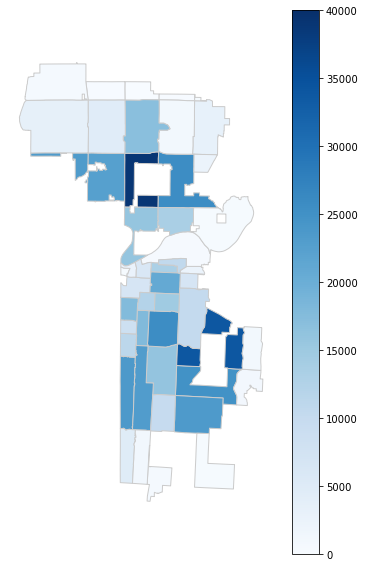

In [97]:
fig, ax = plt.subplots(1, figsize=(6,10))
zips.plot(column='Population', cmap='Blues',linewidth=1, ax=ax, edgecolor='0.8', vmin=0, vmax=40000, legend=True)
ax.axis('off');

In [98]:
# display the zip codes arranged by income
zips.sort_values(by='AGI_per_cap', ascending=False)

,objectid,shape_area,shape_len,geometry,Population,Number of Returns,AGI,AGI_per_cap
postalcode,,,,,,,,
64113,769.0,7.064115e+07,37303.409689,"POLYGON ((-94.58256 39.02560, -94.58285 39.020...",11371.0,5839.0,924760.0,158.376434
64112,798.0,4.131234e+07,25933.500871,"POLYGON ((-94.60181 39.04400, -94.60160 39.043...",8567.0,4702.0,679347.0,144.480434
64120,917.0,2.840283e+08,83900.587314,"POLYGON ((-94.49817 39.15130, -94.49753 39.151...",481.0,174.0,20378.0,117.114943
64166,1023.0,4.222975e+07,36727.183921,"POLYGON ((-94.49198 39.31798, -94.49201 39.314...",248.0,120.0,11514.0,95.950000
64167,1021.0,4.909777e+06,17031.606254,"POLYGON ((-94.47334 39.31157, -94.47335 39.309...",409.0,145.0,13782.0,95.048276
64152,988.0,8.143603e+07,76612.639507,"MULTIPOLYGON (((-94.65830 39.24699, -94.65830 ...",23371.0,12097.0,1102847.0,91.166984
64145,640.0,1.443641e+08,61993.673267,"POLYGON ((-94.60270 38.91330, -94.59958 38.911...",4792.0,2586.0,214498.0,82.945862
64157,971.0,2.887486e+08,81560.398474,"POLYGON ((-94.46461 39.31009, -94.46440 39.309...",3199.0,6873.0,568419.0,82.703186
64164,1033.0,1.358900e+08,49884.206952,"POLYGON ((-94.60075 39.33336, -94.60080 39.330...",239.0,117.0,9494.0,81.145299


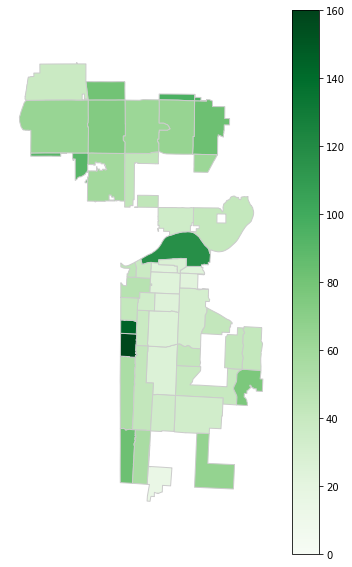

In [99]:
fig, ax = plt.subplots(1, figsize=(6,10))
zips.plot(column='AGI_per_cap', cmap='Greens',linewidth=1, ax=ax, edgecolor='0.8', vmin=0, vmax=160, legend=True)
ax.axis('off');

In [100]:
crimes.sort_values(by='Reported_Date', inplace=True)

In [104]:
crimes['year'] = crimes['Reported_Date'].dt.year
crimes['month'] = crimes['Reported_Date'].dt.month

In [105]:
crimes_by_date = crimes.groupby(by=['year','month'], as_index=False).count()
crimes_by_date.head()

,year,month,Report_No,Reported_Date,IBRS,Zip Code,DVFlag,Firearm Used Flag
0,2010,1,4051,4051,3959,4051,4051,4051
1,2010,2,3413,3413,3326,3413,3413,3413
2,2010,3,4377,4377,4313,4377,4377,4377
3,2010,4,4643,4643,4564,4643,4643,4643
4,2010,5,4922,4922,4862,4922,4922,4922


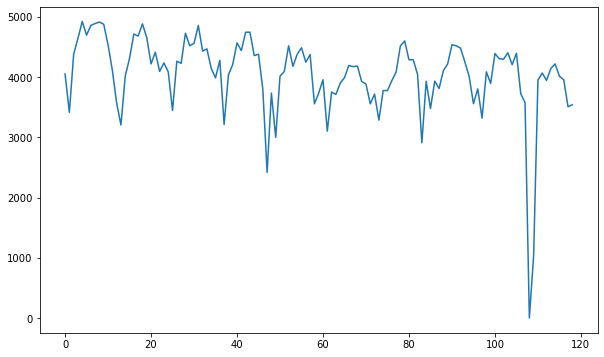

In [108]:
plt.figure(figsize=(10,6))
plt.plot(crimes_by_date.index, crimes_by_date['Report_No'])
plt.show()

In [109]:
violations.sort_values(by='Violation Entry Date', inplace=True)

In [111]:
violations['year'] = violations['Violation Entry Date'].dt.year
violations['month'] = violations['Violation Entry Date'].dt.month

In [112]:
violations_by_date = violations.groupby(by=['year','month'], as_index=False).count()
violations_by_date.head()

,year,month,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Description,Violation Entry Date,Address,Zip Code,Latitude,Longitude
0,2010,1,439,439,439,439,439,439,439,439,439,439,439,439
1,2010,2,1528,1528,1528,1528,1524,1528,1528,1528,1528,1528,1528,1528
2,2010,3,2449,2449,2449,2449,2426,2449,2449,2449,2449,2449,2449,2449
3,2010,4,3602,3602,3602,3602,3601,3602,3602,3602,3602,3602,3602,3602
4,2010,5,2665,2665,2665,2665,2664,2665,2665,2665,2665,2665,2665,2665


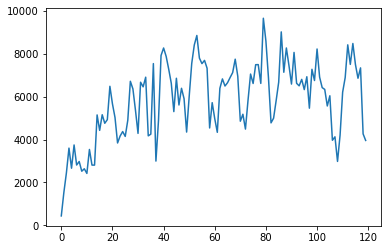

In [114]:
plt.plot(violations_by_date.index, violations_by_date['Case ID'])
plt.show()